# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class
import os
import time




# the parameters needed for cosmology:
# use the last column of Planck 2018 (https://arxiv.org/pdf/1807.06209.pdf) Table 2
# TT,TE,EE+lowE+lensing+BAO
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators.
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665,

'k_pivot': 0.05,
'N_ncdm': 1,
'N_ur': 2.0328,
'm_ncdm': 0.06    

}

# # a simple conversion from cl's to dl's
# def l_to_dl(lp):
#     return lp*(lp+1.)/2./np.pi

Metal device set to: Apple M1 Pro


2023-03-19 10:10:22.218787: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 10:10:22.218900: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Compute mass conversion

In [5]:
%%time 
M = Class()
# M.set(ksz_params)
# M.set(common_params)
M.set(cosmo_params)


M.set({# class_sz parameters:
       'output':'m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'B13',
       'ndim_redshifts' : 50,
       'ndim_masses':50,
       'M_min':1e10,
       'M_max':1e16
        })
M.compute()

m200c_to_m200m_B13 = np.vectorize(M.get_m200c_to_m200m_at_z_and_M)
m200c_to_m500c_B13 = np.vectorize(M.get_m200c_to_m500c_at_z_and_M)


L = Class()
L.set(cosmo_params)
L.set({# class_sz parameters:
       'output':'m200c_to_m200m,m200c_to_m500c',
       'concentration parameter':'D08',
       'ndim_redshifts' : 50,
       'ndim_masses':50,
       'M_min':1e10,
       'M_max':1e16
        })
L.compute()

m200c_to_m200m_D08 = np.vectorize(L.get_m200c_to_m200m_at_z_and_M)
m200c_to_m500c_D08 = np.vectorize(L.get_m200c_to_m500c_at_z_and_M)

CPU times: user 17 s, sys: 37.7 ms, total: 17.1 s
Wall time: 2.51 s


/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_95007/3182272305.py:16: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_95007/3182272305.py:44: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
/var/folders/h0/4_tf3pcn1h32ks9grh325v400000gn/T/ipykernel_95007/3182272305.py:69: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid( b=True, which="both", alpha=0.2, linestyle='--')


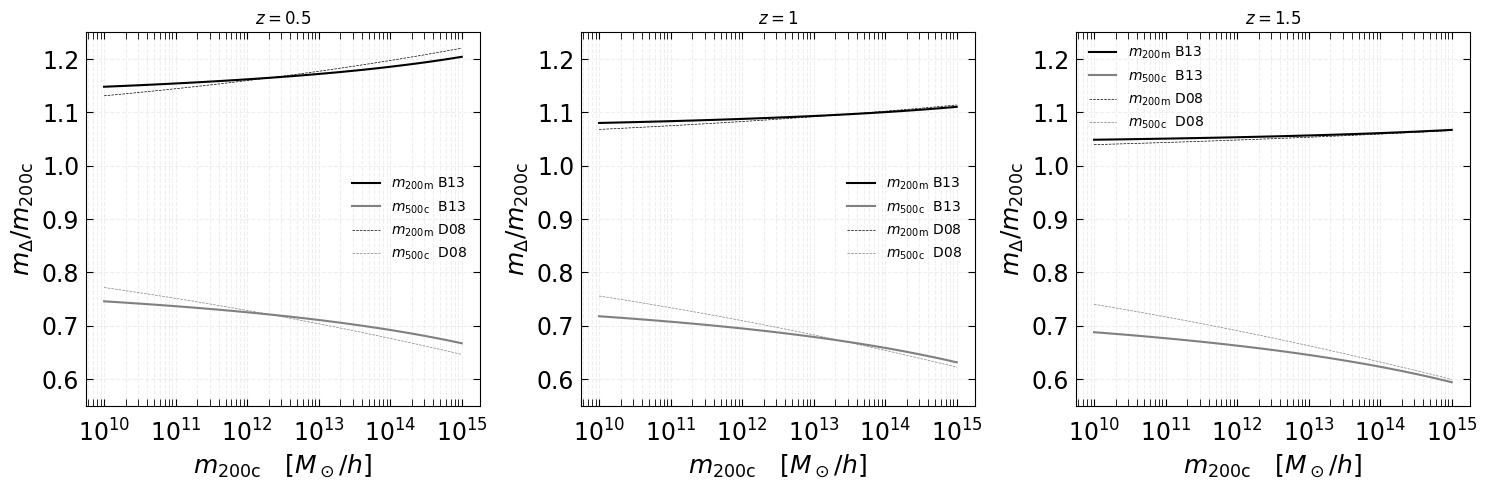

In [6]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

m200c_arr = np.geomspace(1e10,1e15,50)

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_ylabel(r"$m_\Delta/m_{200\mathrm{c}}$",size=title_size)
ax.set_xlabel(r"$m_{200\mathrm{c}}$   $[M_\odot/h]$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim(5e0,4e4)
# ax.set_xlim(1e-2,1e1)
ax.set_ylim(0.55,1.25)
ax.set_title(r"$z=0.5$")

zp = 0.5
ax.plot(m200c_arr,m200c_to_m200m_B13(zp,m200c_arr)/m200c_arr,c='k',label=r'$m_{200\mathrm{m}}$ $\mathrm{B13}$')
ax.plot(m200c_arr,m200c_to_m500c_B13(zp,m200c_arr)/m200c_arr,c='grey',label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{B13}$')

ax.plot(m200c_arr,m200c_to_m200m_D08(zp,m200c_arr)/m200c_arr,c='k',ls='--',lw=0.5,label=r'$m_{200\mathrm{m}}$ $\mathrm{D08}$')
ax.plot(m200c_arr,m200c_to_m500c_D08(zp,m200c_arr)/m200c_arr,c='grey',ls='--',lw=0.5,label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{D08}$')
ax.legend(frameon=False)



ax = ax2
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
# ax.set_ylabel(r"$P(k)$    $[\mathrm{Mpc}/h]^3$",size=title_size)
ax.set_ylabel(r"$m_\Delta/m_{200\mathrm{c}}$",size=title_size)
ax.set_xlabel(r"$m_{200\mathrm{c}}$   $[M_\odot/h]$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0.55,1.25)
# ax.set_xlim(1e-2,1e1)
ax.set_title(r"$z=1$")

zp = 1.
ax.plot(m200c_arr,m200c_to_m200m_B13(zp,m200c_arr)/m200c_arr,c='k',label=r'$m_{200\mathrm{m}}$ $\mathrm{B13}$')
ax.plot(m200c_arr,m200c_to_m500c_B13(zp,m200c_arr)/m200c_arr,c='grey',label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{B13}$')

ax.plot(m200c_arr,m200c_to_m200m_D08(zp,m200c_arr)/m200c_arr,c='k',ls='--',lw=0.5,label=r'$m_{200\mathrm{m}}$ $\mathrm{D08}$')
ax.plot(m200c_arr,m200c_to_m500c_D08(zp,m200c_arr)/m200c_arr,c='grey',ls='--',lw=0.5,label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{D08}$')
ax.legend(frameon=False)

ax = ax3
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( b=True, which="both", alpha=0.2, linestyle='--')
ax.set_ylabel(r"$m_\Delta/m_{200\mathrm{c}}$",size=title_size)
ax.set_xlabel(r"$m_{200\mathrm{c}}$   $[M_\odot/h]$",size=title_size)
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(0.55,1.25)
# ax.set_xlim(1e-2,1e1)
ax.set_title(r"$z=1.5$")

zp = 1.5
ax.plot(m200c_arr,m200c_to_m200m_B13(zp,m200c_arr)/m200c_arr,c='k',label=r'$m_{200\mathrm{m}}$ $\mathrm{B13}$')
ax.plot(m200c_arr,m200c_to_m500c_B13(zp,m200c_arr)/m200c_arr,c='grey',label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{B13}$')

ax.plot(m200c_arr,m200c_to_m200m_D08(zp,m200c_arr)/m200c_arr,c='k',ls='--',lw=0.5,label=r'$m_{200\mathrm{m}}$ $\mathrm{D08}$')
ax.plot(m200c_arr,m200c_to_m500c_D08(zp,m200c_arr)/m200c_arr,c='grey',ls='--',lw=0.5,label=r'$m_{500\mathrm{c}}$ $\,\,\mathrm{D08}$')
ax.legend(frameon=False)
fig.tight_layout()
plt.savefig('figures/mconv.pdf')